In [1]:
from intent_recognition import *

In [2]:
# EXERCICI 4 BÀSIC

hyperparams = {'vocab_size': 500, 'embedding_dim': 256, 'epochs': 10, 'batch_size': 32}

model = Sequential()
model.add(GlobalMaxPooling1D())  # layer 2
#model.add(Dense(128, activation="relu"))  # layer 3

basic = IntentRecognition(model, hyperparams, training_times=5)
basic.train_model()
basic.print_training_information()
basic.evaluate_model()
basic.view_wrong_predictions()

Training model 5/5

Average Training Accuracy: 0.9294261932373047
Average Training F1: 0.7644064784049988
Average Training Loss: 0.3019516825675964
Average Validation Accuracy: 0.9102222323417664
Average Validation F1: 0.5547559857368469
Average Validation Loss: 0.4203406095504761
Best Model Validation Accuracy: 0.9155555367469788
Best Model Validation F1: 0.5647046566009521

Evaluating model...
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9292 - f1_score: 0.4393 - loss: 0.3111  
Test accuracy: 0.9166666865348816
Test Macro F1: 0.5297333002090454
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
12
Sentence:  show flight and prices kansas city to chicago on next wednesday arriving in chicago by 7 pm
Original label:  flight+airfare
Predicted label:  airfare

48
Sentence:  what meals are served on american flight 811 from tampa to milwaukee
Original label:  meal
Predicted label:  flight

49
Sentence:  what meals are served on american flight 665 673 from milwaukee to seattle
Original label:

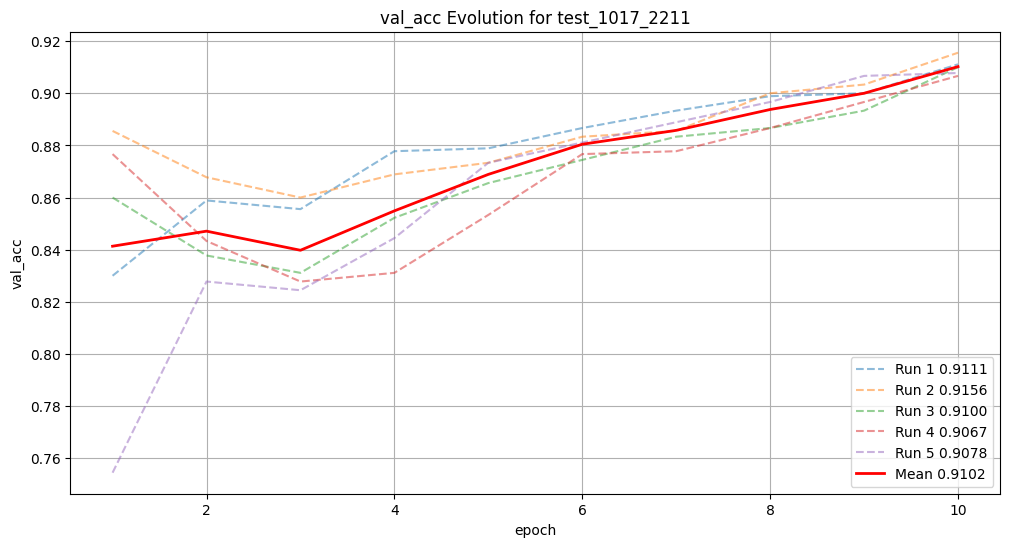

In [5]:
from plot_functions import *
df = pd.read_csv('./results/complete_results.csv')

plot_name_metrics(df, "test_1017_2211", metric="val_acc")

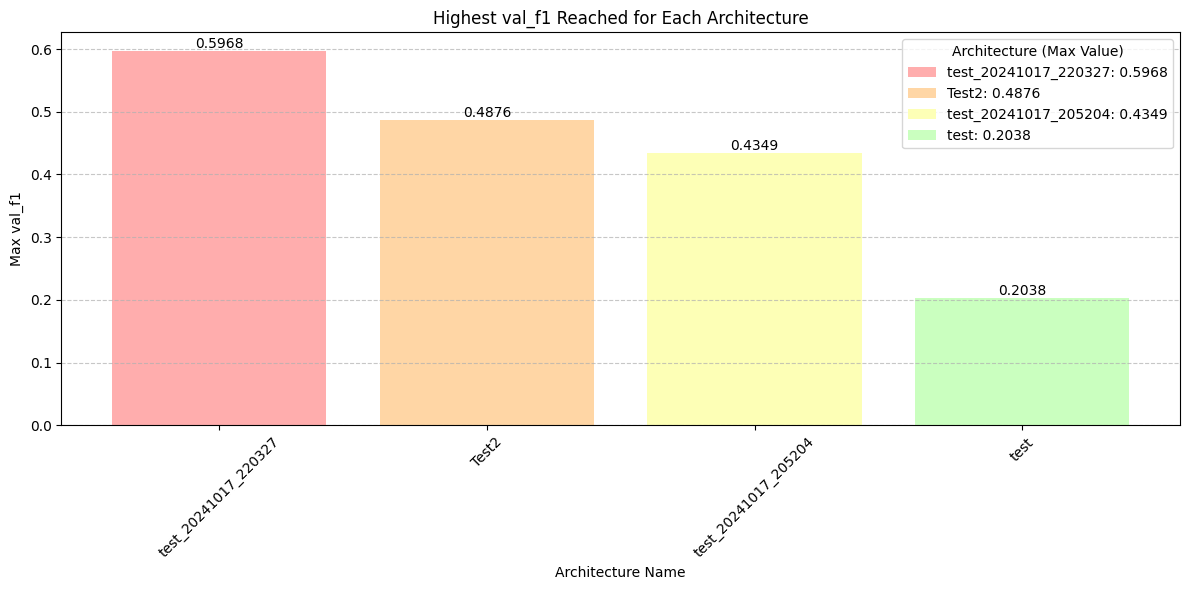

In [22]:
plot_highest_bar(df, metric="val_f1")

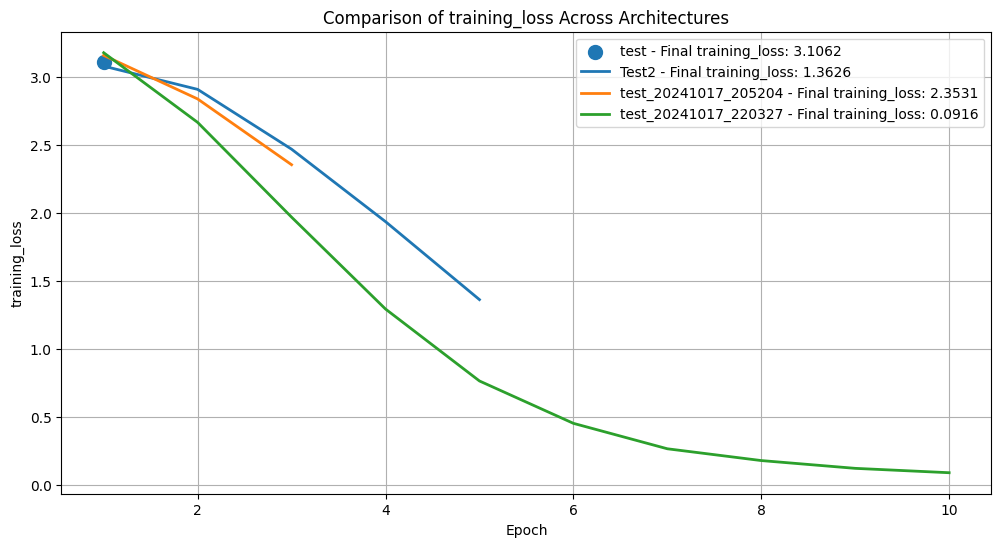

In [20]:
plot_compare_architectures(df, metric="training_loss")

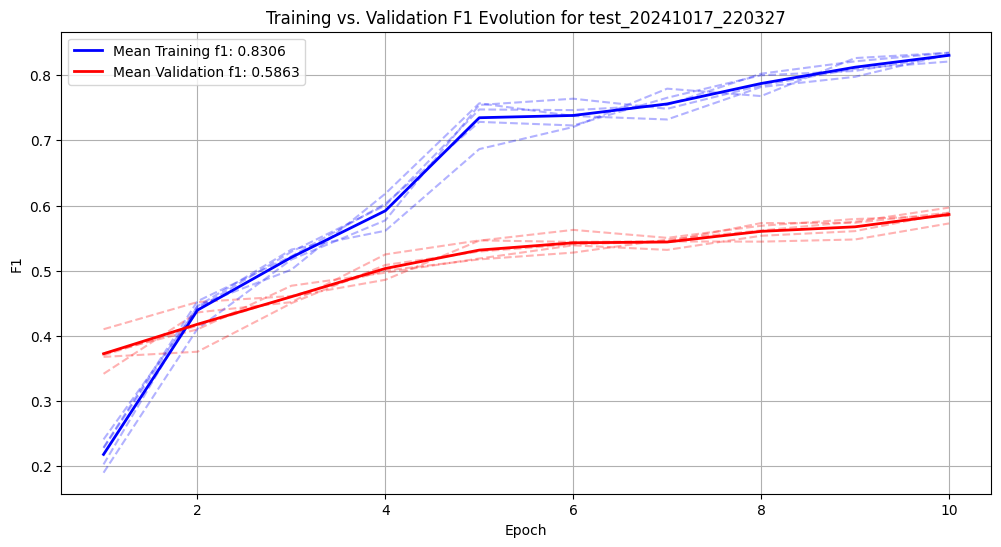

In [18]:
plot_train_val_comparison(df, 'test_20241017_220327', metric='f1', comparison_type='all')